# **Cyclistic Bikeshare - Google Capstone Project in R language**"
### Author: "Lillian Kaiser"
### Date: "September 2023"
### Output: html_document
---

## **Case Background:**

#### In this case study, the business task is to analyze historical bike trip data of Cyclistic, a bike-share company in Chicago, to understand how casual riders and annual members use Cyclistic bikes differently. Cyclistic operates a successful bike-share business with 5,824 bicycles and 692 stations in Chicago. The company offers two membership types:

#### •	Casual Riders: These are customers who purchase single-ride or full-day passes, indicating they use the service infrequently or on a pay-as-you-go basis.

#### •	Annual Members: These are subscribers who pay for annual memberships, providing them with unlimited access to the bikes throughout the year.

#### The primary objective is to gain insights from the data that will help the marketing team develop a new strategy to convert casual riders into annual members. To do this, the analysis will likely involve examining various aspects of bike usage by both types of customers, including ride frequency, trip duration, and popular riding days. The findings can be used to tailor marketing strategies that encourage casual riders to become annual members and thereby increase the company's recurring revenue.

## Introduction

### This is the R language portion of the Google Data Analytics - Cyclistic Bikeshare Capstone Project.

## Load libraries

In [2]:
install.packages("tidyverse")
install.packages("janitor")
install.packages("lubridate")
install.packages("dplyr")

library(tidyverse)
library(janitor)
library(lubridate)
library(readr)
library(dplyr)
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timechange’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’


Warning message in install.packages("dplyr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks st

## Data Source - [Divvy Trip Data] https://divvy-tripdata.s3.amazonaws.com/index.html

#### Start with setting working Directory

#### Import csv files

In [3]:
df1 <- read.csv("/kaggle/input/bike-share-tripdata/202208-divvy-tripdata.csv")
df2 <- read.csv("/kaggle/input/bike-share-tripdata/202209-divvy-tripdata.csv")
df3 <- read.csv("/kaggle/input/bike-share-tripdata/202210-divvy-tripdata.csv")
df4 <- read.csv("/kaggle/input/bike-share-tripdata/202211-divvy-tripdata.csv")
df5 <- read.csv("/kaggle/input/bike-share-tripdata/202212-divvy-tripdata.csv")
df6 <- read.csv("/kaggle/input/bike-share-tripdata/202301-divvy-tripdata.csv")
df7 <- read.csv("/kaggle/input/bike-share-tripdata/202302-divvy-tripdata.csv")
df8 <- read.csv("/kaggle/input/bike-share-tripdata/202303-divvy-tripdata.csv")
df9 <- read.csv("/kaggle/input/bike-share-tripdata/202304-divvy-tripdata.csv")
df10 <- read.csv("/kaggle/input/bike-share-tripdata/202305-divvy-tripdata.csv")
df11 <- read.csv("/kaggle/input/bike-share-tripdata/202306-divvy-tripdata.csv")
df12 <- read.csv("/kaggle/input/bike-share-tripdata/202307-divvy-tripdata.csv")
ls()

[1] "auth"                      "df1"                      
 [3] "df10"                      "df11"                     
 [5] "df12"                      "df2"                      
 [7] "df3"                       "df4"                      
 [9] "df5"                       "df6"                      
[11] "df7"                       "df8"                      
[13] "df9"                       "get_user_secret"          
[15] "GET_USER_SECRET_ENDPOINT"  "KAGGLE_BASE_URL"          
[17] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[19] "season_shades"             "TokenBigQueryKernel"

#### Compare columns names for inconsistencies

In [4]:
lapply(list(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12), colnames)

[[1]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[2]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[3]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[4]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[5]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[6]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[7]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[8]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[9]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[10]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekend"           

[[11]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekday"           

[[12]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "weekday"

#### Rename columns to resemble dataset df1

In [5]:
common_names <- colnames(df1)
for (name in c("df2", "df3", "df4", "df5", "df6", "df7", "df8", "df9", "df10", "df11", "df12")) {
  df <- get(name)
  colnames(df) <- common_names
  assign(name, df)
}

#### Compare column names for inconsistencies - No Inconsistencies found.

In [6]:
lapply(list(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12), colnames)

[[1]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[2]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[3]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[4]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[5]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[6]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[7]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[8]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[9]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[10]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[11]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"           

[[12]]
[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "end_station_name"  
[7] "member_casual"      "ride_length"        "Weekday"

#### check for data structures updates

In [7]:
lapply(list(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12), str)

'data.frame':	775760 obs. of  9 variables:
 $ ride_id           : chr  "ED191ED7F00BECCF" "E46D933189FCF759" "266C52F351F4BAF2" "68808BAC64219ED9" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "8/11/2022 15:48" "8/16/2022 19:28" "8/5/2022 0:45" "8/11/2022 11:40" ...
 $ ended_at          : chr  "8/31/2022 4:37" "9/4/2022 7:28" "8/21/2022 8:27" "8/27/2022 8:46" ...
 $ start_station_name: chr  "LaSalle St & Jackson Blvd" "Damen Ave & Division St" "Wells St & Evergreen Ave" "Rainbow Beach" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...
 $ ride_length       : num  28129 26640 23502 22866 22824 ...
 $ Weekday           : int  5 3 6 5 5 2 6 6 7 7 ...
'data.frame':	692635 obs. of  9 variables:
 $ ride_id           : chr  "051579FE81B73E1D" "5743E72AC947CEFD" "EC40AF51298295F0" "EA4E04E93402FF43" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

#### Convert started_at and Ended_at columns to date/time columns.

In [8]:
df_list <- list(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12)


for (i in seq_along(df_list)) {
  df_list[[i]]$started_at <- as.POSIXct(df_list[[i]]$started_at, format="%m/%d/%Y %H:%M")
  df_list[[i]]$ended_at <- as.POSIXct(df_list[[i]]$ended_at, format="%m/%d/%Y %H:%M")
}

#### Check data structures (dbl, chr, date)

In [9]:
str(df_list[[1]])
str(df_list[[2]])
str(df_list[[3]])
str(df_list[[4]])
str(df_list[[5]])
str(df_list[[6]])
str(df_list[[7]])
str(df_list[[8]])
str(df_list[[9]])
str(df_list[[10]])
str(df_list[[11]])
str(df_list[[12]])

'data.frame':	775760 obs. of  9 variables:
 $ ride_id           : chr  "ED191ED7F00BECCF" "E46D933189FCF759" "266C52F351F4BAF2" "68808BAC64219ED9" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2022-08-11 15:48:00" "2022-08-16 19:28:00" ...
 $ ended_at          : POSIXct, format: "2022-08-31 04:37:00" "2022-09-04 07:28:00" ...
 $ start_station_name: chr  "LaSalle St & Jackson Blvd" "Damen Ave & Division St" "Wells St & Evergreen Ave" "Rainbow Beach" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...
 $ ride_length       : num  28129 26640 23502 22866 22824 ...
 $ Weekday           : int  5 3 6 5 5 2 6 6 7 7 ...
'data.frame':	692635 obs. of  9 variables:
 $ ride_id           : chr  "051579FE81B73E1D" "5743E72AC947CEFD" "EC40AF51298295F0" "EA4E04E93402FF43" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_b

#### Merge 12 Datafiles into 1 datafile

In [10]:
Bikeshare_all <- do.call(rbind, df_list)

#### Check, Clean, and transform data

#### Check and clean data 

In [11]:
###his section of code is commented out due to the length of data returned.

#### unique(Bikeshare_all$ride_length)  # Check for unusual or unexpected values
#### 0 %in% unique(Bikeshare_all$ride_length) # Check for 0 values 
#### sum(is.na(Bikeshare_all$ride_length))  # Count existing NAs before conversion

#### Transform data

In [12]:
library(dplyr)

In [13]:
Bikeshare_all_wdate <- Bikeshare_all %>%
  mutate(
    year = format(as.Date(started_at), "%Y"),
    month = format(as.Date(started_at), "%m"),
    date = format(as.Date(started_at), "%d"),
    Weekday = format(as.Date(started_at), "%A"),
    ride_length = difftime(ended_at, started_at, units = "mins"),
    start_time = strftime(started_at, "%H:%M")
  )

In [14]:
head(Bikeshare_all_wdate)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,Weekday,year,month,date,start_time
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<drtn>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ED191ED7F00BECCF,docked_bike,2022-08-11 15:48:00,2022-08-31 04:37:00,LaSalle St & Jackson Blvd,,casual,28129 mins,Thursday,2022,08,11,15:48
2,E46D933189FCF759,docked_bike,2022-08-16 19:28:00,2022-09-04 07:28:00,Damen Ave & Division St,,casual,26640 mins,Tuesday,2022,08,16,19:28
3,266C52F351F4BAF2,docked_bike,2022-08-05 00:45:00,2022-08-21 08:27:00,Wells St & Evergreen Ave,,casual,23502 mins,Friday,2022,08,05,00:45
4,68808BAC64219ED9,docked_bike,2022-08-11 11:40:00,2022-08-27 08:46:00,Rainbow Beach,,casual,22866 mins,Thursday,2022,08,11,11:40
5,4B8DCD981DB92C3A,docked_bike,2022-08-11 12:54:00,2022-08-27 09:18:00,Canal St & Madison St,,casual,22824 mins,Thursday,2022,08,11,12:54
6,07648CD4D6FF69BD,docked_bike,2022-08-15 20:49:00,2022-08-30 20:59:00,Theater on the Lake,,casual,21610 mins,Monday,2022,08,15,20:49


#### Check data for transformation updates

In [15]:
head(Bikeshare_all_wdate)
dim(Bikeshare_all_wdate)
str(Bikeshare_all_wdate)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,Weekday,year,month,date,start_time
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<drtn>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ED191ED7F00BECCF,docked_bike,2022-08-11 15:48:00,2022-08-31 04:37:00,LaSalle St & Jackson Blvd,,casual,28129 mins,Thursday,2022,08,11,15:48
2,E46D933189FCF759,docked_bike,2022-08-16 19:28:00,2022-09-04 07:28:00,Damen Ave & Division St,,casual,26640 mins,Tuesday,2022,08,16,19:28
3,266C52F351F4BAF2,docked_bike,2022-08-05 00:45:00,2022-08-21 08:27:00,Wells St & Evergreen Ave,,casual,23502 mins,Friday,2022,08,05,00:45
4,68808BAC64219ED9,docked_bike,2022-08-11 11:40:00,2022-08-27 08:46:00,Rainbow Beach,,casual,22866 mins,Thursday,2022,08,11,11:40
5,4B8DCD981DB92C3A,docked_bike,2022-08-11 12:54:00,2022-08-27 09:18:00,Canal St & Madison St,,casual,22824 mins,Thursday,2022,08,11,12:54
6,07648CD4D6FF69BD,docked_bike,2022-08-15 20:49:00,2022-08-30 20:59:00,Theater on the Lake,,casual,21610 mins,Monday,2022,08,15,20:49


[1] 5633613      13

'data.frame':	5633613 obs. of  13 variables:
 $ ride_id           : chr  "ED191ED7F00BECCF" "E46D933189FCF759" "266C52F351F4BAF2" "68808BAC64219ED9" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2022-08-11 15:48:00" "2022-08-16 19:28:00" ...
 $ ended_at          : POSIXct, format: "2022-08-31 04:37:00" "2022-09-04 07:28:00" ...
 $ start_station_name: chr  "LaSalle St & Jackson Blvd" "Damen Ave & Division St" "Wells St & Evergreen Ave" "Rainbow Beach" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...
 $ ride_length       : 'difftime' num  28129 26640 23502 22866 ...
  ..- attr(*, "units")= chr "mins"
 $ Weekday           : chr  "Thursday" "Tuesday" "Friday" "Thursday" ...
 $ year              : chr  "2022" "2022" "2022" "2022" ...
 $ month             : chr  "08" "08" "08" "08" ...
 $ date              : chr  "11" "16" "05" "11" ...
 $ 

#### Extract rows by year into separate files.

In [16]:
Bikeshare_22 <- filter(Bikeshare_all_wdate, year == "2022")
Bikeshare_23 <- filter(Bikeshare_all_wdate, year == "2023")

#### Comparing entry count and column count

In [17]:
dim(Bikeshare_all)
dim(Bikeshare_all_wdate)
dim(Bikeshare_22)
dim(Bikeshare_23)

[1] 5633613       9

[1] 5633613      13

[1] 2531621      13

[1] 3101992      13

#### Compare structure of slit files to Bikeshare_all

In [18]:
str(Bikeshare_all)
str(Bikeshare_22)
str(Bikeshare_23)

'data.frame':	5633613 obs. of  9 variables:
 $ ride_id           : chr  "ED191ED7F00BECCF" "E46D933189FCF759" "266C52F351F4BAF2" "68808BAC64219ED9" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2022-08-11 15:48:00" "2022-08-16 19:28:00" ...
 $ ended_at          : POSIXct, format: "2022-08-31 04:37:00" "2022-09-04 07:28:00" ...
 $ start_station_name: chr  "LaSalle St & Jackson Blvd" "Damen Ave & Division St" "Wells St & Evergreen Ave" "Rainbow Beach" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...
 $ ride_length       : chr  "28129" "26640" "23502" "22866" ...
 $ Weekday           : num  5 3 6 5 5 2 6 6 7 7 ...
'data.frame':	2531621 obs. of  13 variables:
 $ ride_id           : chr  "ED191ED7F00BECCF" "E46D933189FCF759" "266C52F351F4BAF2" "68808BAC64219ED9" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "doc

#### Summary

In [19]:
summary(Bikeshare_all)
summary(Bikeshare_all_wdate)

   ride_id          rideable_type        started_at                 
 Length:5633613     Length:5633613     Min.   :2022-08-01 00:00:00  
 Class :character   Class :character   1st Qu.:2022-09-28 08:46:00  
 Mode  :character   Mode  :character   Median :2023-02-15 16:36:00  
                                       Mean   :2023-02-01 18:53:28  
                                       3rd Qu.:2023-06-03 08:31:00  
                                       Max.   :2023-07-31 23:59:00  
    ended_at                   start_station_name end_station_name  
 Min.   :2022-08-01 00:05:00   Length:5633613     Length:5633613    
 1st Qu.:2022-09-28 08:59:00   Class :character   Class :character  
 Median :2023-02-15 16:48:00   Mode  :character   Mode  :character  
 Mean   :2023-02-01 19:12:08                                        
 3rd Qu.:2023-06-03 08:50:00                                        
 Max.   :2023-08-12 04:53:00                                        
 member_casual      ride_length   

   ride_id          rideable_type        started_at                 
 Length:5633613     Length:5633613     Min.   :2022-08-01 00:00:00  
 Class :character   Class :character   1st Qu.:2022-09-28 08:46:00  
 Mode  :character   Mode  :character   Median :2023-02-15 16:36:00  
                                       Mean   :2023-02-01 18:53:28  
                                       3rd Qu.:2023-06-03 08:31:00  
                                       Max.   :2023-07-31 23:59:00  
    ended_at                   start_station_name end_station_name  
 Min.   :2022-08-01 00:05:00   Length:5633613     Length:5633613    
 1st Qu.:2022-09-28 08:59:00   Class :character   Class :character  
 Median :2023-02-15 16:48:00   Mode  :character   Mode  :character  
 Mean   :2023-02-01 19:12:08                                        
 3rd Qu.:2023-06-03 08:50:00                                        
 Max.   :2023-08-12 04:53:00                                        
 member_casual      ride_length   

#### Export CSVs files 

In [20]:
write.csv(Bikeshare_all, "Bikeshare_all.csv", row.names = FALSE)
write.csv(Bikeshare_all_wdate, "Bikeshare_all_wdate.csv", row.names = FALSE)
write.csv(Bikeshare_22, "Bikeshare_22.csv", row.names = FALSE)
write.csv(Bikeshare_23, "Bikeshare_23.csv", row.names = FALSE)

#### Ride Duration Overview for Bikeshare_all_wdate Dataset 

In [21]:
Bikeshare_all_wdate %>%
  summarise(
    avg_ride = mean(ride_length, na.rm = TRUE),
    median_ride = median(ride_length, na.rm = TRUE),
    max_ride = max(ride_length, na.rm = TRUE),
    min_ride = min(ride_length, na.rm = TRUE)
  )

avg_ride,median_ride,max_ride,min_ride
<drtn>,<drtn>,<drtn>,<drtn>
18.65489 mins,10 mins,51462 mins,1 mins


## Visualizations
### 1. Ride Length Trends: Focused Variable Snapshot
#### Revealing typical and unusual ride lengths. As a result, this chart reveals a significant drop in rides over 4 hours in lenth (240 minutes)

#### Ride lengths under 24 Hours

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

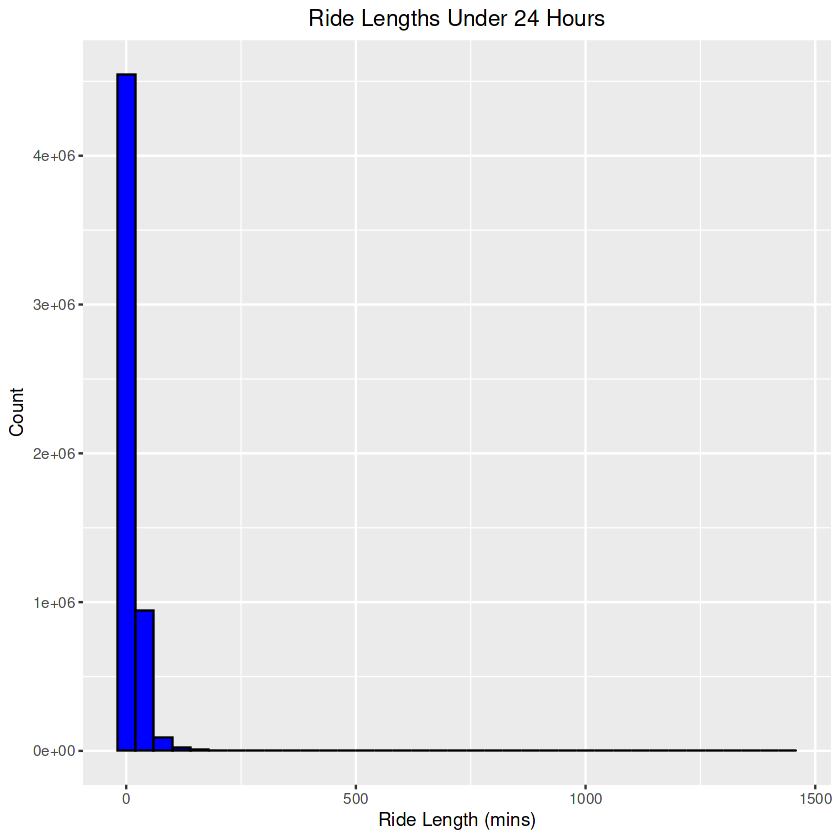

In [22]:
Bikeshare_filtered <- Bikeshare_all_wdate %>%
  mutate(ride_length = as.numeric(ride_length, units = "mins")) %>%
  filter(ride_length <= 1440)

ggplot(Bikeshare_filtered, aes(x = ride_length)) +
  geom_histogram(binwidth = 40, fill = "blue", color = "black") +
  labs(title = "Ride Lengths Under 24 Hours", x = "Ride Length (mins)", y = "Count") +
  theme(
    plot.title = element_text(hjust = 0.5),  # Center title
  )
  scale_y_continuous(labels = scales::comma)

#### Bar chart of Ride Lengths < 4 hours
#### Excluded extreme outliers to better represent typical rider behavior.

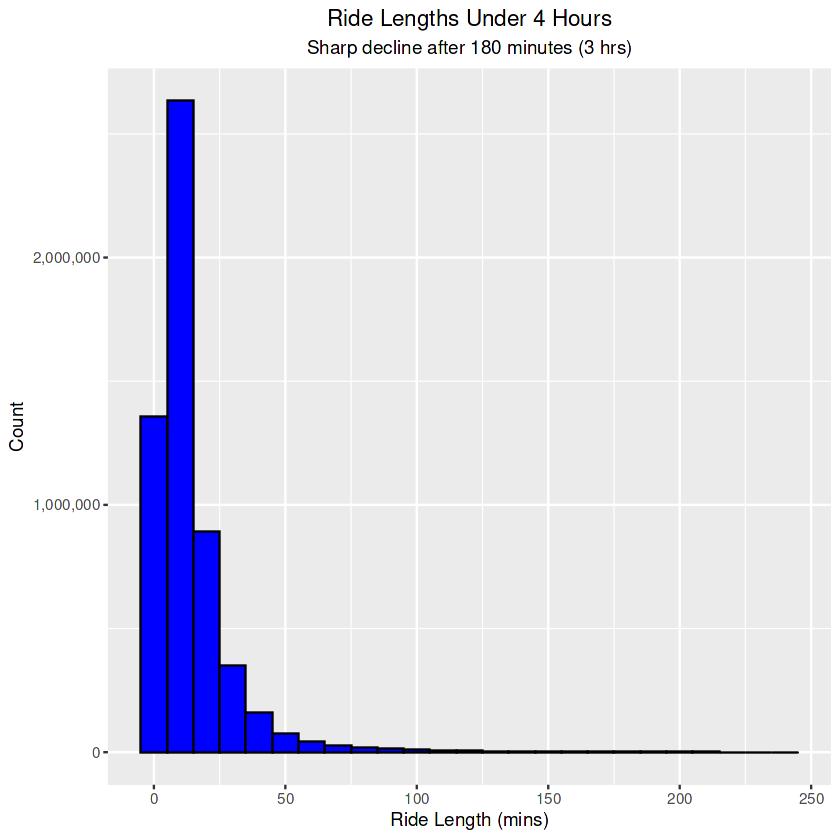

In [23]:
Bikeshare_filtered <- Bikeshare_all_wdate %>%
  mutate(ride_length = as.numeric(ride_length, units = "mins")) %>%
  filter(ride_length <= 240)

ggplot(Bikeshare_filtered, aes(x = ride_length)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") +
  labs(
    title = "Ride Lengths Under 4 Hours",
    subtitle = "Sharp decline after 180 minutes (3 hrs)",
    x = "Ride Length (mins)",
    y = "Count"
  ) +
theme(
    plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5),  
  )+
  scale_y_continuous(labels = comma)

#### Weekly Trends - By Member Type
#### Ride Duration Insights

#### This indicates that casual riders tend to take longer trips compared to members.

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


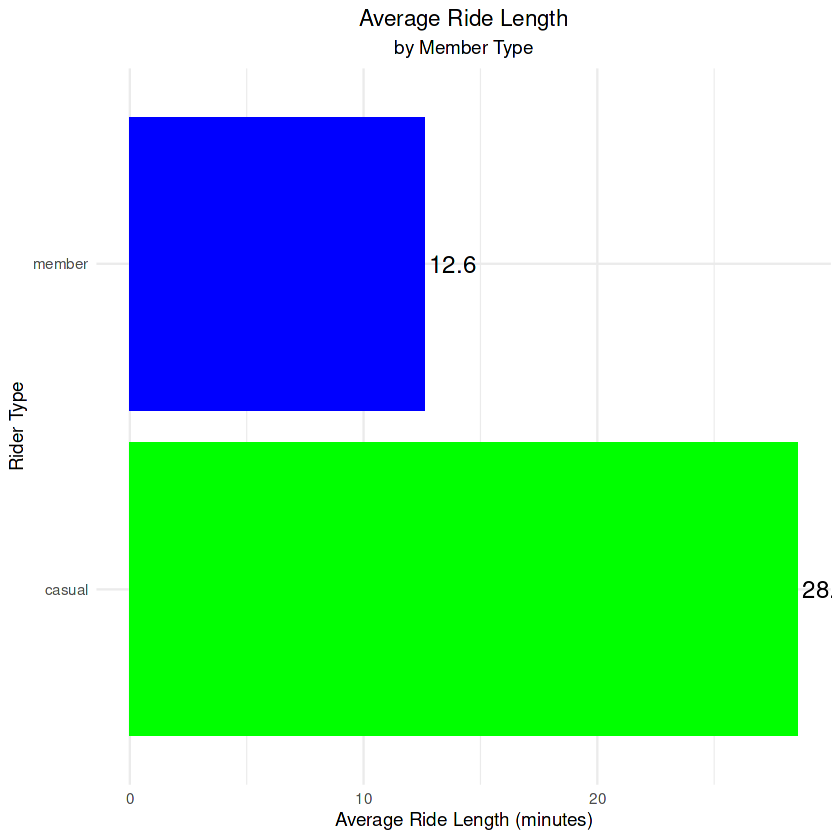

In [24]:
avg_ride_duration <- Bikeshare_all_wdate %>%
  group_by(member_casual) %>%
  summarize(avg_duration = mean(ride_length, na.rm = TRUE))

ggplot(avg_ride_duration, aes(x = member_casual, y = avg_duration, fill = member_casual)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  geom_text(aes(label = round(avg_duration, 1)), hjust = -0.1, size = 5) +
  labs(
    title = "Average Ride Length",
    subtitle = "by Member Type",
    x = "Rider Type",
    y = "Average Ride Length (minutes)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",  # Remove legend
    plot.title = element_text(hjust = 0.5),  # Center title
    plot.subtitle = element_text(hjust = 0.5)  # Center subtitle
  ) +
  scale_fill_manual(values = c("casual" = "green", "member" = "blue"))

## 2. Comparative Ride Length by User Type
#### Ride length scale with the user type comparison.

#### Ride Length by Rider Type (summary stats)

In [25]:

duration_summary <- Bikeshare_all_wdate %>%
  filter(!is.na(ride_length), ride_length <= 1440) %>%  # Filter NAs and cap at 24 hours
  group_by(member_casual) %>%
  summarise(
    avg_duration = mean(ride_length),
    med_duration = median(ride_length),
    sd_duration = sd(ride_length),
    max_duration = max(ride_length),
    min_duration = min(ride_length),
    .groups = "drop"
  )

duration_summary

member_casual,avg_duration,med_duration,sd_duration,max_duration,min_duration
<chr>,<drtn>,<drtn>,<dbl>,<drtn>,<drtn>
casual,20.69886 mins,12 mins,41.52145,1440 mins,1 mins
member,12.23147 mins,9 mins,19.74773,1440 mins,1 mins


#### Ride Lengths by Rider Type (overlapping histograms)


Warning message:
“Removed 49710 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


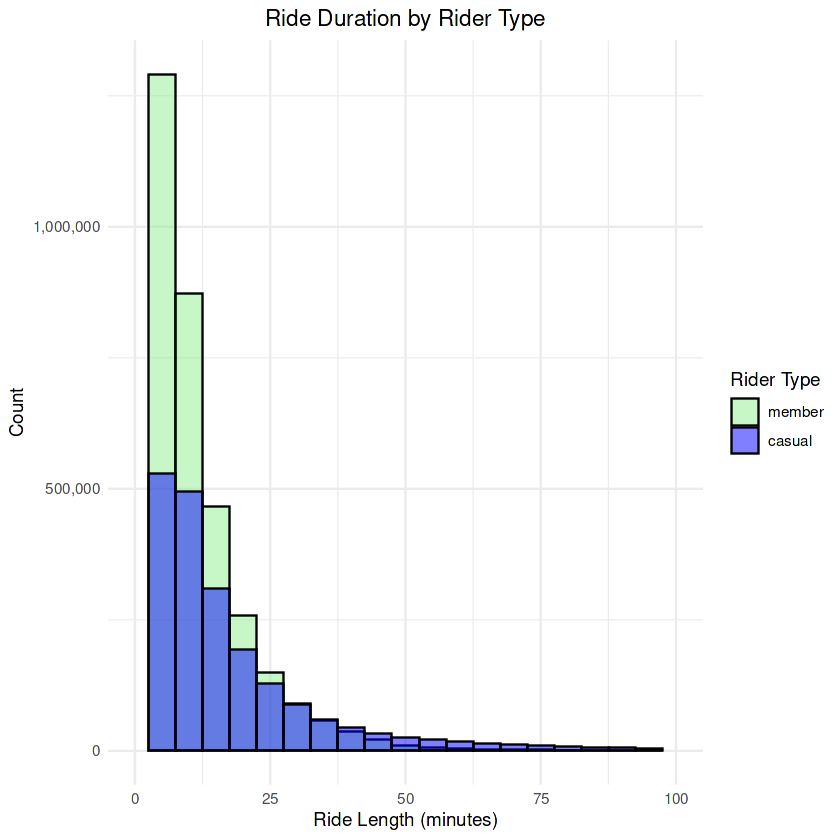

In [26]:
Bikeshare_all_wdate <- Bikeshare_all_wdate %>%
  mutate(
    started_at = as.POSIXct(started_at, format = "%m/%d/%Y %H:%M"),
    ended_at   = as.POSIXct(ended_at, format = "%m/%d/%Y %H:%M"),
    ride_length = as.numeric(difftime(ended_at, started_at, units = "mins"))
  )

Bikeshare_filtered <- Bikeshare_all_wdate %>%
  filter(!is.na(ride_length), !is.na(member_casual), ride_length <= 1440)

Bikeshare_filtered$member_casual <- factor(
  Bikeshare_filtered$member_casual,
  levels = c("member", "casual")
)

ggplot(Bikeshare_filtered, aes(x = ride_length, fill = member_casual)) +
  geom_histogram(binwidth = 5, position = "identity", alpha = 0.5, color = "black") +
  scale_fill_manual(values = c("casual" = "blue", "member" = "lightgreen")) +
  labs(
    title = "Ride Duration by Rider Type",
    x = "Ride Length (minutes)",
    y = "Count",
    fill = "Rider Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5), 
  )+
  scale_y_continuous(labels = scales::comma) +
  xlim(0, 100)

In [27]:
sum(is.na(Bikeshare_all_wdate$ride_length))       # How many are NA
sum(!is.finite(Bikeshare_all_wdate$ride_length))  # How many are Inf/NaN
sum(Bikeshare_all_wdate$ride_length <= 0)         # How many are 0 or negative

[1] 0

[1] 0

[1] 0

## 3. Temporal Patterns (Days and Times) - 
#### This explores when people are riding, broken down by day and time.
  
#### Monthly Ride Trends by Rider Type

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


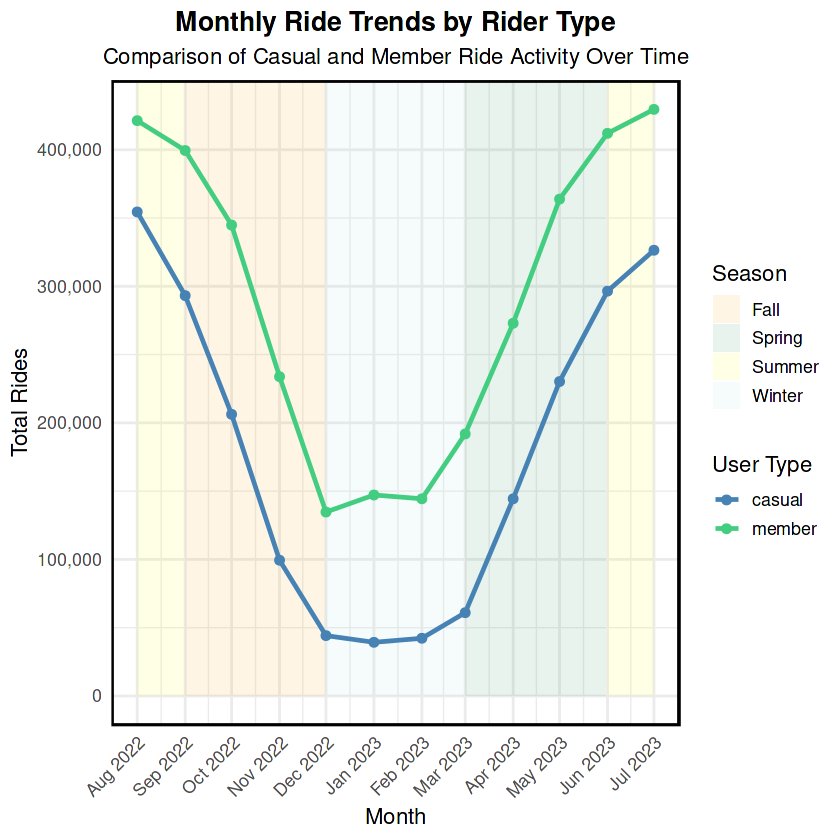

In [28]:
 # Define seasonal periods
season_shades <- data.frame(
  xmin = as.Date(c("2022-08-01","2022-09-01", "2022-12-01", "2023-03-01", "2023-06-01")),
  xmax = as.Date(c("2022-08-31","2022-11-30", "2023-02-28", "2023-05-31", "2023-07-1")),
  season = c("Summer", "Fall", "Winter", "Spring", "Summer" )
)

# Prepare monthly rides data
monthly_rides <- Bikeshare_all_wdate %>%
  group_by(year, month, member_casual) %>%
  summarise(total_rides = n(), .groups = "drop") %>%
  mutate(month_year = as.Date(paste0(year, "-", month, "-01")))

# Create the combined plot
ggplot() +
  # Seasonal shading
  geom_rect(data = season_shades,
            aes(xmin = xmin, xmax = xmax, ymin = 0, ymax = Inf, fill = season),
            alpha = 0.1, inherit.aes = FALSE) +
  # Line and point layers
  geom_line(data = monthly_rides,
            aes(x = month_year, y = total_rides, color = member_casual),
            size = 1) +
  geom_point(data = monthly_rides,
             aes(x = month_year, y = total_rides, color = member_casual),
             size = 2) +
  # Labels and scales
  labs(
    title = "Monthly Ride Trends by Rider Type",
    subtitle = "Comparison of Casual and Member Ride Activity Over Time",
    x = "Month",
    y = "Total Rides",
    color = "User Type",
    fill = "Season"
  ) +
  scale_y_continuous(labels = comma) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
  scale_color_manual(values = c("member" = "seagreen3", "casual" = "steelblue")) +
  scale_fill_manual(values = c("Winter" = "lightblue", "Spring" = "seagreen",
                               "Summer" = "yellow", "Fall" = "orange")) +
  theme_minimal(base_size = 13) +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )


#### Rides by Weekday and Rider Type

#### Average Ride Length by Member Type and Weekday

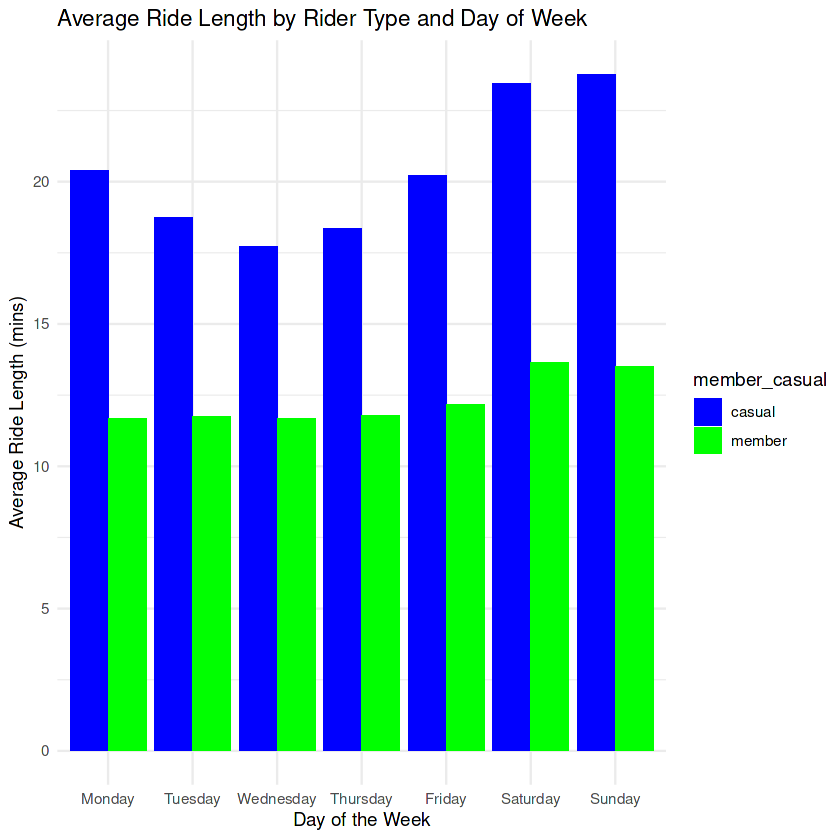

In [29]:
avg_ride_by_type_weekday <- Bikeshare_all_wdate %>%
  filter(!is.na(ride_length), ride_length <= 1440) %>%
  group_by(Weekday, member_casual) %>%
  summarise(avg_ride = as.numeric(mean(ride_length)), .groups = "drop")

avg_ride_by_type_weekday$Weekday <- factor(avg_ride_by_type_weekday$Weekday,
      levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

ggplot(avg_ride_by_type_weekday, aes(x = Weekday, y = avg_ride, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(
    title = "Average Ride Length by Rider Type and Day of Week",
    x = "Day of the Week",
    y = "Average Ride Length (mins)"
  ) +
  scale_fill_manual(values = c("member" = "green", "casual" = "blue")) +
  theme_minimal()

#### Average Ride Length by Member Type and Weekday (Stacked)

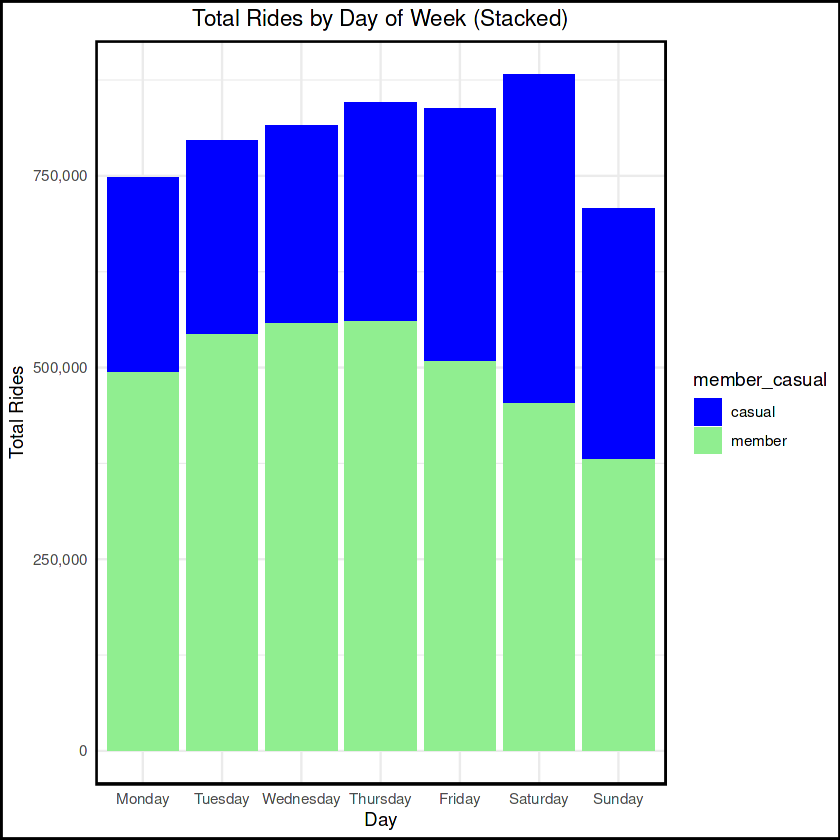

In [34]:
 ride_summary <- Bikeshare_all_wdate %>%
    group_by(Weekday, member_casual) %>%
    summarise(total_rides = n(), .groups = "drop")
  
  ride_summary$Weekday <- factor(ride_summary$Weekday,
                                 levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
  
    ggplot(ride_summary, aes(x = Weekday, y = total_rides, fill = member_casual)) +
    geom_bar(stat = "identity", position = "stack") +  # 'stack' instead of 'dodge'
    labs(title = "Total Rides by Day of Week (Stacked)", x = "Day", y = "Total Rides") +
    scale_y_continuous(labels = scales::comma) +
    scale_fill_manual(values = c("member" = "lightgreen", "casual" = "blue")) +
    theme_minimal() +
    theme(
      plot.background = element_rect(color = "black", fill = NA, size = 1),
      panel.border = element_rect(color = "black", fill = NA, size = 1),
      plot.title = element_text(hjust = 0.5)
      )

#### Heatmap of Ride Frequency by Hour and Weekday

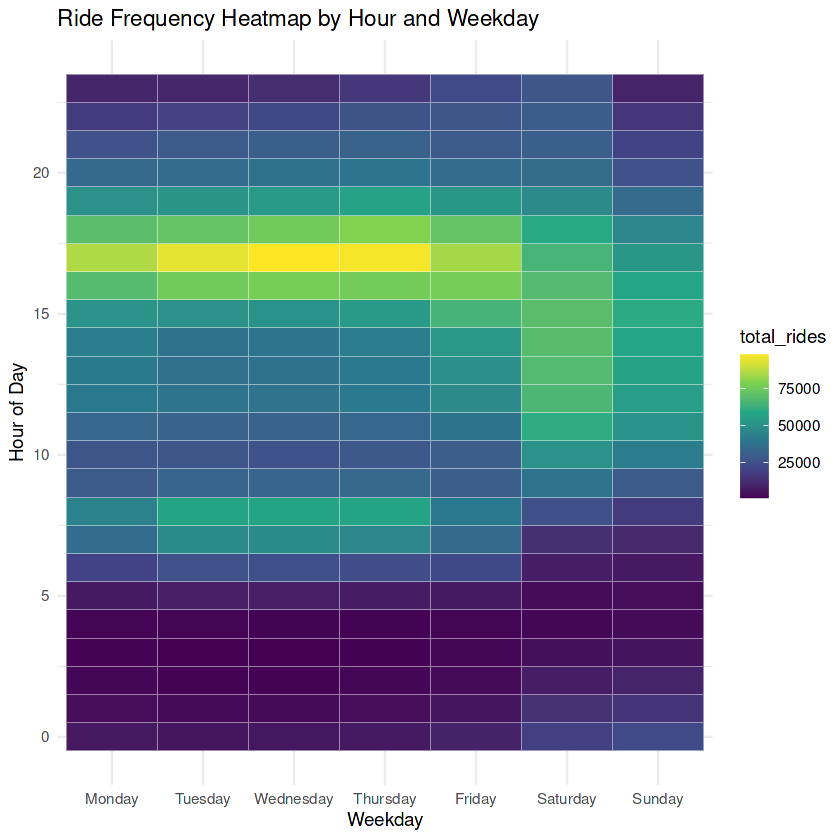

In [30]:
Bikeshare_all_wdate <- Bikeshare_all_wdate %>%
  mutate(
    hour = hour(started_at),
    Weekday = wday(started_at, label = TRUE, abbr = FALSE)
  )

heatmap_data <- Bikeshare_all_wdate %>%
  group_by(Weekday, hour) %>%
  summarise(total_rides = n(), .groups = "drop")

heatmap_data$Weekday <- factor(
  heatmap_data$Weekday,
  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
)

ggplot(heatmap_data, aes(x = Weekday, y = hour, fill = total_rides)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c() +
  labs(
    title = "Ride Frequency Heatmap by Hour and Weekday",
    x = "Weekday",
    y = "Hour of Day"
  ) +
  theme_minimal()

## 4. Special Interest
#### Top 15 Stations for Long Rides

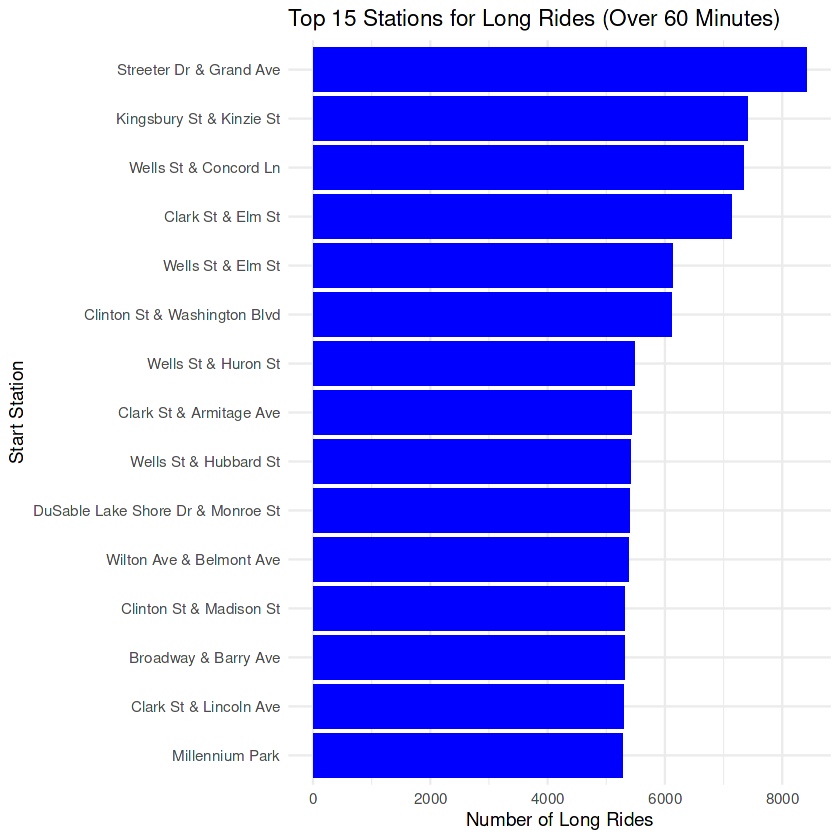

In [31]:
Bikeshare_all <- Bikeshare_all %>%
  filter(
    !is.na(start_station_name),
    start_station_name != "Unknown",
    start_station_name != "",
    start_station_name != "Black"
  )

# Bikeshare_all <- Bikeshare_all %>%
#  filter(!is.na(start_station_name) & start_station_name != "Unknown")

# Filter for long rides (e.g., greater than 60 minutes)
long_rides <- Bikeshare_all %>%
  filter(ride_length > 60)

# Count occurrences per start station
top_long_ride_stations <- long_rides %>%
  count(start_station_name, sort = TRUE) %>%
  slice_max(n, n = 15)  # Get top 15 stations

ggplot(top_long_ride_stations, aes(x = reorder(start_station_name, n), y = n)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +  # Flip for readability
  labs(
    title = "Top 15 Stations for Long Rides (Over 60 Minutes)",
    x = "Start Station",
    y = "Number of Long Rides"
  ) +
  theme_minimal()


#### Bar chart: Average Ride Duration per Bike Type

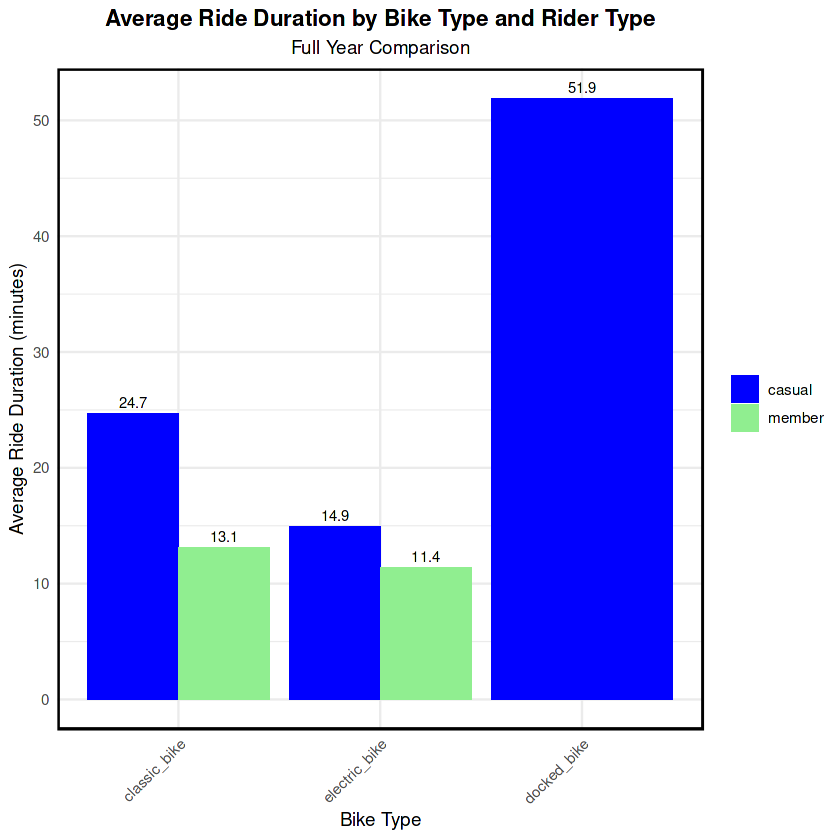

In [32]:
  Bikeshare_all_wdate %>% 
  filter(!is.na(ride_length), ride_length > 0, ride_length <= 1440) %>%
  group_by(member_casual, rideable_type) %>%
  summarise(average_duration = mean(ride_length), .groups = "drop") %>%
  arrange(member_casual, rideable_type) %>%
  ggplot(aes(x = rideable_type, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = round(average_duration, 1)),
            position = position_dodge(width = 0.9), vjust = -0.5, size = 3) +
  scale_x_discrete(limits = c("classic_bike", "electric_bike", "docked_bike")) +
  scale_y_continuous(labels = scales::comma) +
  scale_fill_manual(values = c("casual" = "blue", "member" = "lightgreen")) +
  labs(
    title = "Average Ride Duration by Bike Type and Rider Type",
    subtitle = "Full Year Comparison",
    y = "Average Ride Duration (minutes)",
    x = "Bike Type",
    fill = "Rider Type"
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1)
    )